# Regressão Linear e Regularização

$\newcommand{\bX}{\mathbf{X}}$
$\newcommand{\bw}{\mathbf{w}}$
$\newcommand{\by}{\mathbf{y}}$
$\newcommand{\bx}{\mathbf{x}}$
$\newcommand{\bp}{\mathbf{p}}$
$\newcommand{\RR}{\mathbb{R}}$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Regressão linear simples

 **Obs:** Nesse contexto, **simples** significa **com um único atributo** (n=1)

In [3]:
def gen_data(n_samples, random_state):
    rng = np.random.RandomState(random_state)
    x = rng.uniform(2, 12, size=n_samples)
    y = 70 + 8*x + 10*rng.standard_normal(size=n_samples)
    X = x.reshape(-1, 1)
    return X, y

(100, 1) (100,)


Text(0, 0.5, 'Height (cm)')

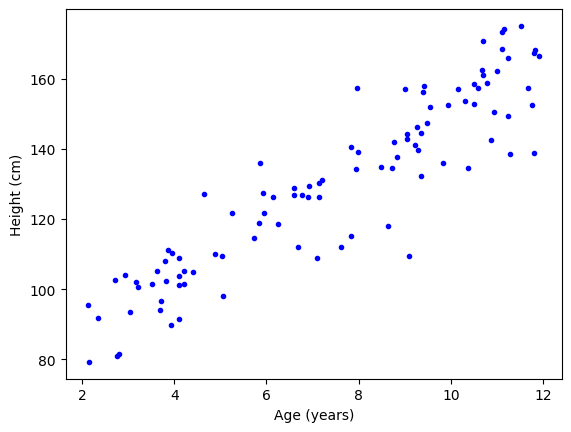

In [4]:
X, y = gen_data(n_samples=100, random_state=27)
print(X.shape, y.shape)

plt.plot(X, y, 'b.')
plt.xlabel('Age (years)')
plt.ylabel('Height (cm)')

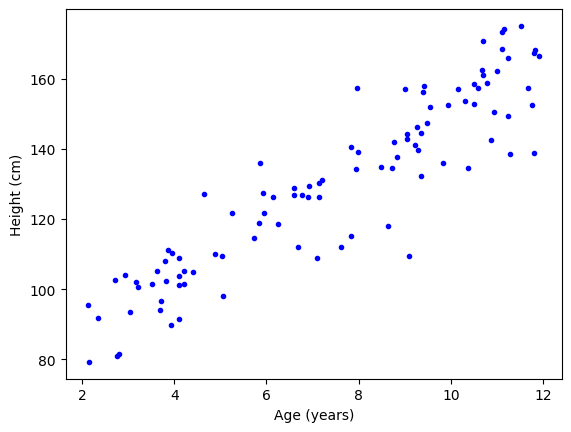

In [5]:
#def plot_data():
def plot_data(X, y):
    plt.plot(X, y, 'b.')
    plt.xlabel('Age (years)')
    plt.ylabel('Height (cm)')
    

plot_data(X, y)

### Regressão linear usando sklearn

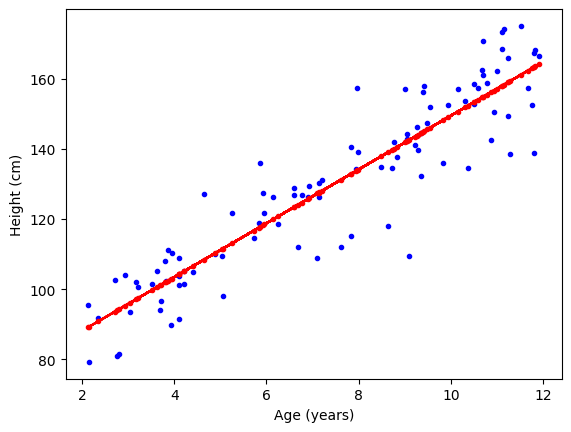

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plot_data(X, y)
plt.plot(X, y_pred, 'r.-')

b = 72.72933285993868, w = [7.68114992]


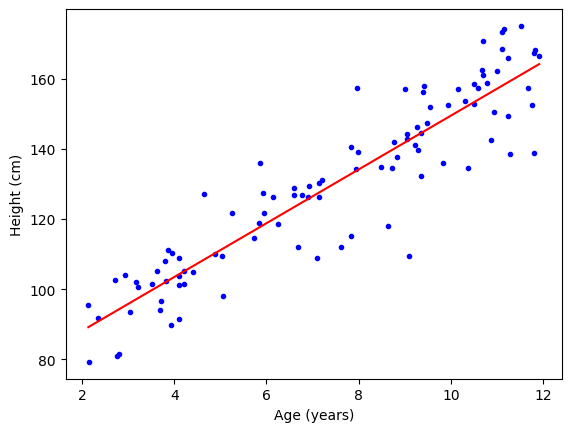

In [7]:
b = model.intercept_
w = model.coef_
print(f'b = {b}, w = {w}')

plot_data(X, y)
x_line = np.array([X.min(), X.max()])
y_line = b + w*x_line
#y_line = model.predict(x_line.reshape(-1, 1))
plt.plot(x_line, y_line, 'r-')

### Implementação em Python

- Modelo: $\hat{y} = \bw^T \bx = \bx^T \bw$, onde $\bw = (b, w_1, \ldots, w_n)^T$ e $\bx = (1, x_1, \ldots, x_n)^T$
- Treinamento: $\bw = (\bX^T \bX)^{-1}\bX^T \by$, onde $\bX[i] = (1, {\bx^{[i]}}^T)$
- Predições: $\hat{\by} = \bX\bw$

In [8]:
class LinReg():
    def __init__(self):
        return
    
    def _add_ones_column(self, X):
        X = np.c_[np.ones(X.shape[0]), X]
        return X
    
    def fit(self, X, y):
        X = self._add_ones_column(X)
        self.w = np.linalg.inv(X.T @ X) @ (X.T @ y)
        self.intercept_ = self.w[0]
        self.coef_ = self.w[1:]
        return self

    def predict(self, X):
        X = self._add_ones_column(X)
        y_pred = X @ self.w
        return y_pred

**Exercício em sala:** complete a função acima.

<details><summary>Solução</summary>

```python
def predict(self, X):
    X = self._add_ones_column(X)
    y_pred = X @ self.w
    return y_pred
```
</details>

In [9]:
class LinReg:
    def __init__(self):
        pass  # Nenhum return é necessário aqui

    def _add_ones_column(self, X: np.ndarray) -> np.ndarray:
        return np.c_[np.ones(X.shape[0]), X]  # Retorna diretamente o resultado

    def fit(self, X: np.ndarray, y: np.ndarray) -> 'LinReg':
        X = self._add_ones_column(X)
        self.w = np.linalg.pinv(X) @ y  # Usando a pseudo-inversa
        self.intercept_ = self.w[0]
        self.coef_ = self.w[1:]
        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        X = self._add_ones_column(X)
        return X @ self.w

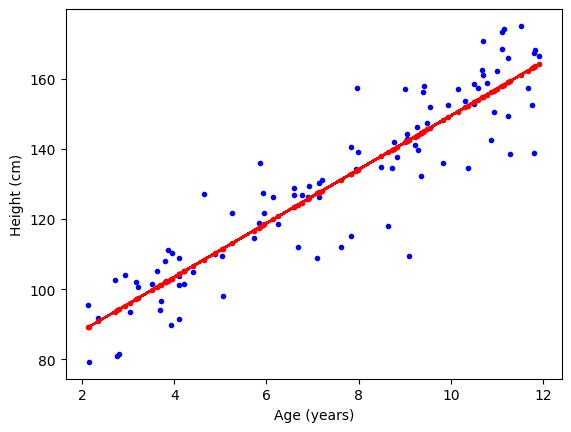

In [10]:
model = LinReg()
model.fit(X, y)
y_pred = model.predict(X)

plot_data(X, y)
plt.plot(X, y_pred, 'r.-')

b = 72.72933285993868, w = [7.68114992]


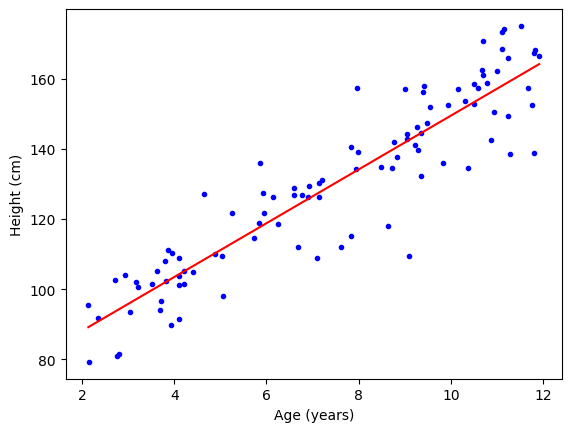

In [11]:
b = model.intercept_
w = model.coef_
print(f'b = {b}, w = {w}')

plot_data(X, y)
x_line = np.array([X.min(), X.max()])
y_line = b + w*x_line
#y_line = model.predict(x_line.reshape(-1, 1))
plt.plot(x_line, y_line, 'r-')

In [12]:
# Back to sklearn
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

### Avaliação do modelo

In [13]:
mse = np.mean((y - y_pred)**2)
mse

99.54452956702794

In [14]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, y_pred)
mse

99.54452956702794

*Baseline*: modelo constante $\hat{y} = b$

$b = ((1,\ldots,1) (1,\ldots,1)^T)^{-1} (1,\ldots,1) \by = m^{-1} \sum_{i=1}^m y^{(i)}$

(**Obs**: *baseline* refere-se a um modelo relativamente simples de implementar ou facilmente disponível com o qual você pretende comparar o seu modelo. Pode ser até mesmo o modelo estado-da-arte de um determinado problema, se já estiver bem consolidado na literatura.)



In [15]:
y.mean()

129.91290855197673

In [16]:
y_const = np.full(y.shape, y.mean())
y_const.shape

(100,)

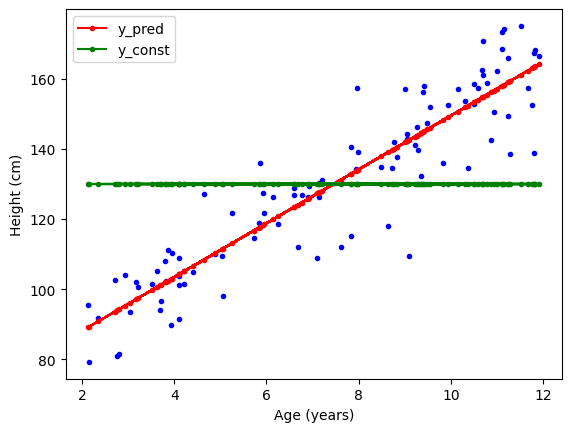

In [17]:
plot_data(X, y)
plt.plot(X, y_pred, 'r.-', label='y_pred')
plt.plot(X, y_const, 'g.-', label='y_const')
plt.legend()

In [18]:
mse_const = mean_squared_error(y, y_const)
mse_const

619.1762684843089

In [19]:
y.var()

619.1762684843089

In [20]:
mse/mse_const

0.16076929080422367

In [21]:
r2 = 1 - mse/mse_const
r2

0.8392307091957764

In [22]:
from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.8392307091957764

In [23]:
model.score(X, y)

0.8392307091957764

Note que `r2` pode ser negativo se o modelo for pior que o constante!

r2        : 0.8392307091957764
r2 (const): 0.0
r2 (bad)  : -8.298159781680559


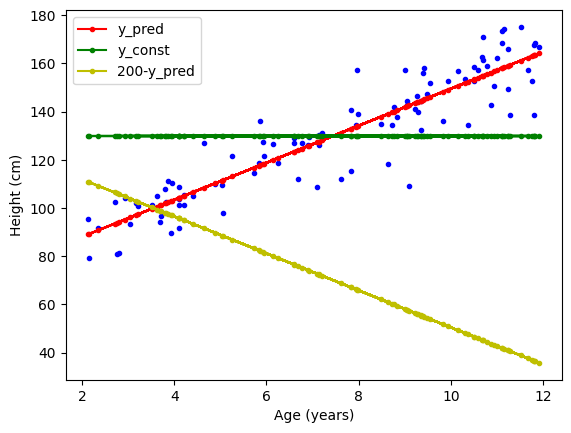

In [24]:
y_bad = 200 - y_pred
print('r2        :', r2_score(y, y_pred))
print('r2 (const):', r2_score(y, y_const))
print('r2 (bad)  :', r2_score(y, y_bad))
plot_data(X, y)
plt.plot(X, y_pred, 'r.-', label='y_pred')
plt.plot(X, y_const, 'g.-', label='y_const')
plt.plot(X, y_bad, 'y.-', label='200-y_pred')
plt.legend()

No caso particular da **regressão linear simples por mínimos quadrados**, temos `r2` = $r^2$, onde:
- $r = \text{cov}(\bx, \by) \; / \left(\text{std}(\bx) \cdot \text{std}(\by) \right)$ 
é o *coeficiente de correlação de Pearson* e
- $\text{cov}(\bx, \by) = n^{-1}\sum_{j=1}^n (x_j - \text{mean}(\bx))(y_j - \text{mean}(\by))$ é a covariância entre $x$ e $y$

In [25]:
x = X.reshape(-1)
#cov = np.cov(x, y, ddof=0)[0, 1]
cov = np.mean( (x - x.mean()) * (y - y.mean()) )
r = cov/(x.std()*y.std())
print(f'cov = {cov}')
print(f'r   = {r}')
print(f'r2  = {r**2}')

cov = 67.65025346295633
r   = 0.916095360317787
r2  = 0.839230709195776


In [26]:
np.cov(x, y, ddof=0)

array([[  8.80730804,  67.65025346],
       [ 67.65025346, 619.17626848]])

In [27]:
from scipy.stats import pearsonr
r = pearsonr(y, y_pred)[0]
print(f'r   = {r}')
print(f'r2  = {r**2}')

r   = 0.916095360317787
r2  = 0.839230709195776


**Coeficiente de correlação:**

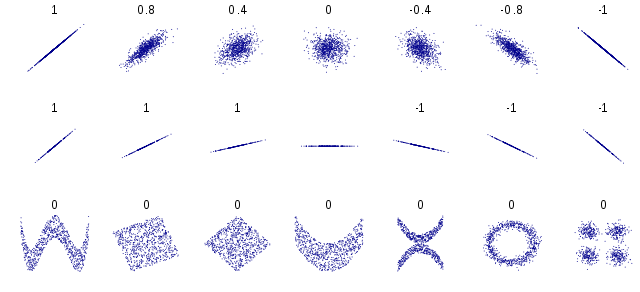

### Outras métricas de avaliação

In [28]:
rmse = np.sqrt(mean_squared_error(y, y_pred))
rmse

9.9772004874628

In [29]:
rmse = mean_squared_error(y, y_pred, squared=False)
rmse

C:\Users\msftr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


9.9772004874628

**Exercício em sala:** escreva uma função que calcula o RMSE sem usar a função `mean_squared_error` do sklearn, usando apenas NumPy.

<details><summary>Solução</summary>

```python
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))
```
ou
```python
def root_mean_squared_error(y_true, y_pred):
    return ((y_true - y_pred)**2).mean()**0.5
```
ou simplesmente
```python
root_mean_squared_error = lambda a, b: ((a-b)**2).mean()**0.5
```
</details>

In [30]:
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

In [31]:
rmse = root_mean_squared_error(y, y_pred)
rmse

9.9772004874628

In [32]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
mae = mean_absolute_error(y, y_pred)
mape = mean_absolute_percentage_error(y, y_pred) # mean relative error
print(f'RMSE: {rmse:.3} cm')
print(f' MAE: {mae:.3} cm')
print(f'MAPE: {mape:.1%}')

RMSE: 9.98 cm
 MAE: 7.56 cm
MAPE: 6.0%


In [33]:
from sklearn.metrics import median_absolute_error
medae = median_absolute_error(y, y_pred)
print(f'MedAE: {medae:.3} cm')

MedAE: 5.29 cm


Text(0.5, 0, 'absolute error')

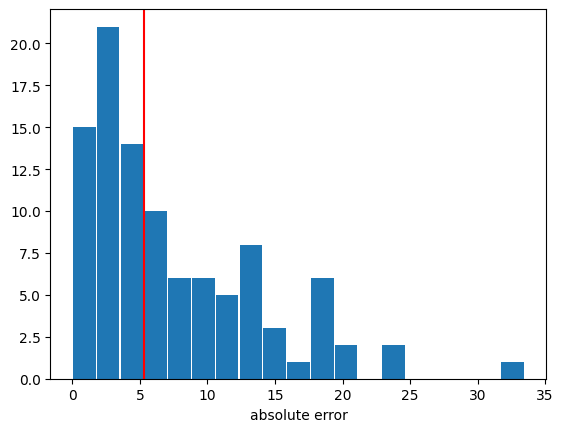

In [34]:
bins = np.arange(0, np.abs(y - y_pred).max() + medae/3, medae/3)
plt.hist(np.abs(y - y_pred), bins=bins, rwidth=0.95)
plt.axvline(medae, color='r')
plt.xlabel('absolute error')

C:\Users\msftr\AppData\Local\Temp\ipykernel_40768\1939616512.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(np.abs(y - y_pred), labels=['linear regression'])


Text(0, 0.5, 'absolute error')

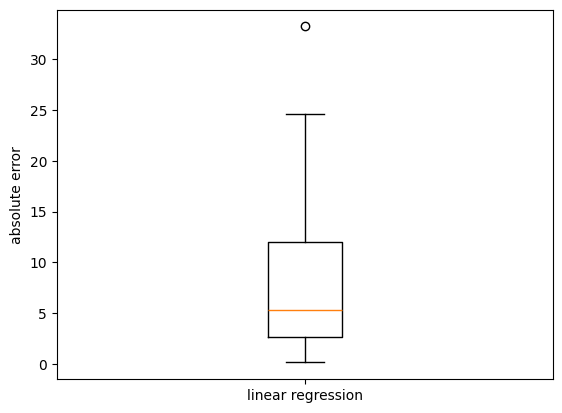

In [35]:
plt.boxplot(np.abs(y - y_pred), labels=['linear regression'])
plt.ylabel('absolute error')

Definições de um *boxplot*:

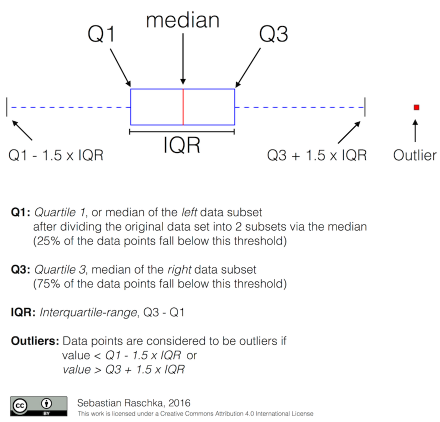

- https://matplotlib.org/stable/_images/boxplot_explanation.png
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html
- https://en.wikipedia.org/wiki/Box_plot

C:\Users\msftr\AppData\Local\Temp\ipykernel_40768\2551538220.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(np.abs(y - y_pred)/y * 100, labels=['linear regression'])


{'whiskers': [<matplotlib.lines.Line2D at 0x2a672c1e270>,
 'caps': [<matplotlib.lines.Line2D at 0x2a672c1e780>,
 'boxes': [<matplotlib.lines.Line2D at 0x2a672c1dfa0>],
 'medians': [<matplotlib.lines.Line2D at 0x2a672c1ecc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2a672c1ef30>],
 'means': []}

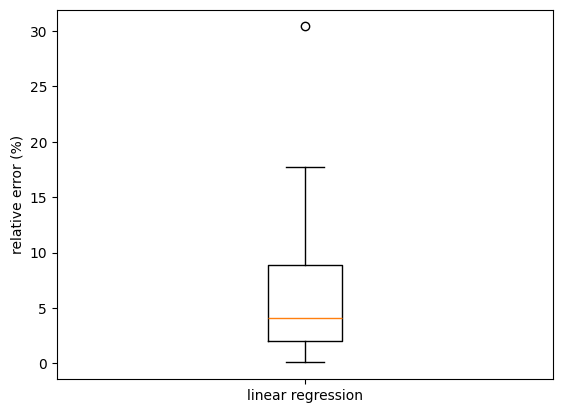

In [36]:
plt.ylabel('relative error (%)')
plt.boxplot(np.abs(y - y_pred)/y * 100, labels=['linear regression'])

### Avaliação no conjunto de teste

A partir de agora, vamos usar uma notação mais apropriada para o conjunto de treinamento (`X_train`, `y_train`), para distinguir do conjunto de teste e não confundir com o conjunto completo (treinamento + teste). 

In [37]:
# To make sure we don't use them by mistake
X, y = None, None

In [38]:
X_train, y_train = gen_data(n_samples=100, random_state=27)
X_test, y_test = gen_data(n_samples=100, random_state=6)
print('Training set:', X_train.shape, y_train.shape)
print('    Test set:', X_test.shape, y_test.shape)

model = LinearRegression()
model.fit(X_train, y_train)

print('')
print('Train RMSE:', root_mean_squared_error(y_train, model.predict(X_train)))
print(' Test RMSE:', root_mean_squared_error(y_test, model.predict(X_test)))

Training set: (100, 1) (100,)
    Test set: (100, 1) (100,)

Train RMSE: 9.9772004874628
 Test RMSE: 8.672002340636721


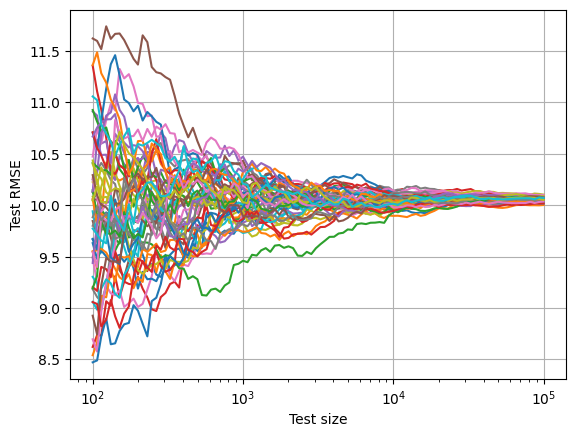

In [39]:
test_sizes = np.geomspace(100, 100000, 100).astype(int)
test_errors = np.zeros(len(test_sizes))
for r in range(50):
    X_test, y_test = gen_data(n_samples=test_sizes[-1], random_state=100+r)
    y_test_pred = model.predict(X_test)
    for i in range(len(test_sizes)):
        test_errors[i] = root_mean_squared_error(y_test[:test_sizes[i]], y_test_pred[:test_sizes[i]])
    plt.plot(test_sizes, test_errors)
plt.xlabel('Test size')
plt.ylabel('Test RMSE')
plt.xscale('log')
plt.grid()

- Para um dado modelo, o desempenho de teste apresenta uma variação estatística que diminui com o número de amostras de teste.

In [40]:
X_test, y_test = gen_data(n_samples=100000, random_state=6)

X_train, y_train = gen_data(n_samples=100, random_state=27)
print('Training set:', X_train.shape, y_train.shape)
print('    Test set:', X_test.shape, y_test.shape)

model = LinearRegression()
model.fit(X_train, y_train)

print('')
print('Train RMSE:', root_mean_squared_error(y_train, model.predict(X_train)))
print(' Test RMSE:', root_mean_squared_error(y_test, model.predict(X_test)))

Training set: (100, 1) (100,)
    Test set: (100000, 1) (100000,)

Train RMSE: 9.9772004874628
 Test RMSE: 10.072116846214126


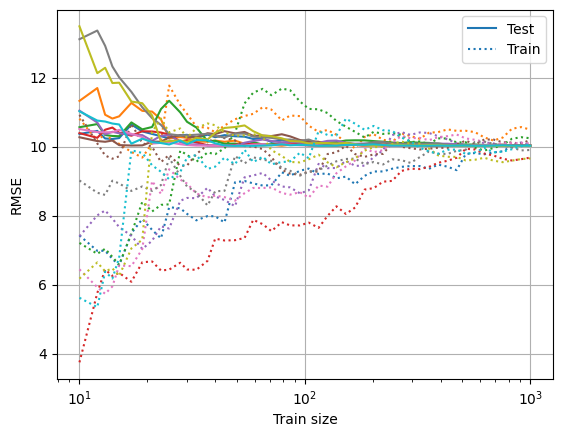

In [41]:
train_sizes = np.geomspace(10, 1000, 50).astype(int)
train_errors = np.zeros(len(train_sizes))
test_errors = np.zeros(len(train_sizes))
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
for r in range(10):
    X_train, y_train = gen_data(n_samples=train_sizes[-1], random_state=12345+r)
    for i in range(len(train_sizes)):
        model = LinearRegression()
        model.fit(X_train[:train_sizes[i]], y_train[:train_sizes[i]])
        y_train_pred = model.predict(X_train[:train_sizes[i]])
        y_test_pred = model.predict(X_test)
        train_errors[i] = root_mean_squared_error(y_train[:train_sizes[i]], y_train_pred[:train_sizes[i]])
        test_errors[i] = root_mean_squared_error(y_test, y_test_pred)
    plt.plot(train_sizes, test_errors, '-', color=colors[r], label='Test' if r==0 else None)
    plt.plot(train_sizes, train_errors, ':', color=colors[r], label='Train' if r==0 else None)
plt.xlabel('Train size')
plt.ylabel('RMSE')
plt.legend()
plt.xscale('log')
plt.grid()

- O overfitting se reduz à medida que o número de amostras de treinamento aumenta.

## Regressão linear múltipla

**Múltipla**: múltiplos atributos (n>1)

O exemplo a seguir é retirado do livro do [*An Introduction to Statistical Learning*](https://www.statlearning.com). Como descrito no Cap. 2, os dados consistem no total de vendas de um produto (em milhares de unidades), junto com seu orçamento de publicidade (em milhares de dólares) para três meios de comunicação diferentes (TV, rádio e jornal), em 200 localidades. A variável-alvo (rótulo, variável de saída) é a coluna `sales`.

In [42]:
import pandas as pd
df = pd.read_csv('http://www.statlearning.com/s/Advertising.csv', index_col=0)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


### Análise exploratória

1. Trace o histograma de cada uma das 4 variáveis (colunas da tabela).
1. Calcule a matriz de correlação entre as variáveis, utilizando a função `pd.DataFrame.corr`.
1. Para cada atributo (variável de entrada), trace o gráfico do valor-alvo em função do atributo. Utilize um gráfico de dispersão (*scatter plot*), i.e., trace apenas os marcadores, não linhas.
1. O que já se pode afirmar sobre os dados a partir dessa análise exploratória?

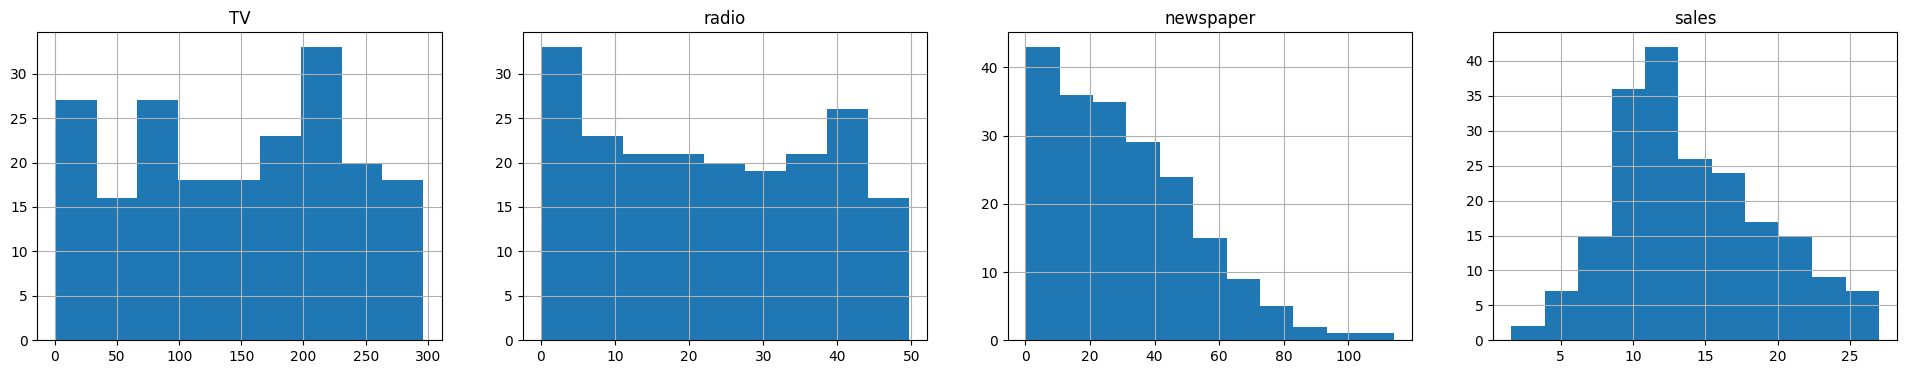

In [43]:
plt.figure(figsize=(24,4))
for i, c in enumerate(df.columns):
    plt.subplot(1, 4, i+1)
    plt.hist(df[c], bins='auto')
    plt.title(c)
    plt.grid()

array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'radio'}>,
        <Axes: title={'center': 'newspaper'}>,
        <Axes: title={'center': 'sales'}>]], dtype=object)

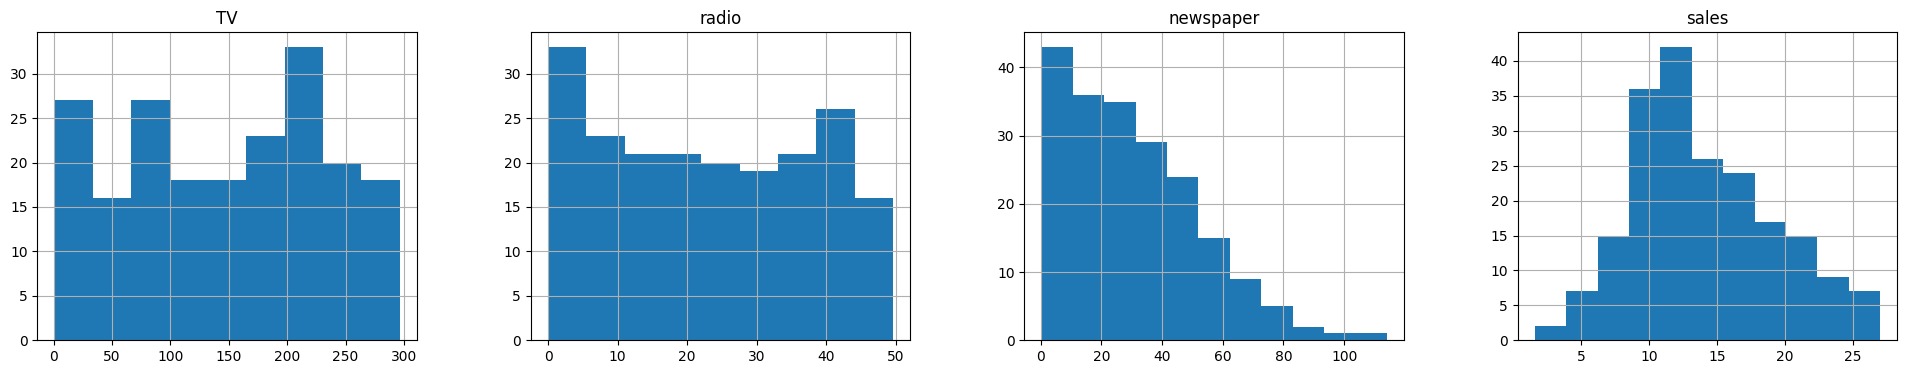

In [44]:
df.hist(bins='auto', layout=(1,4), figsize=(24,4))

In [45]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


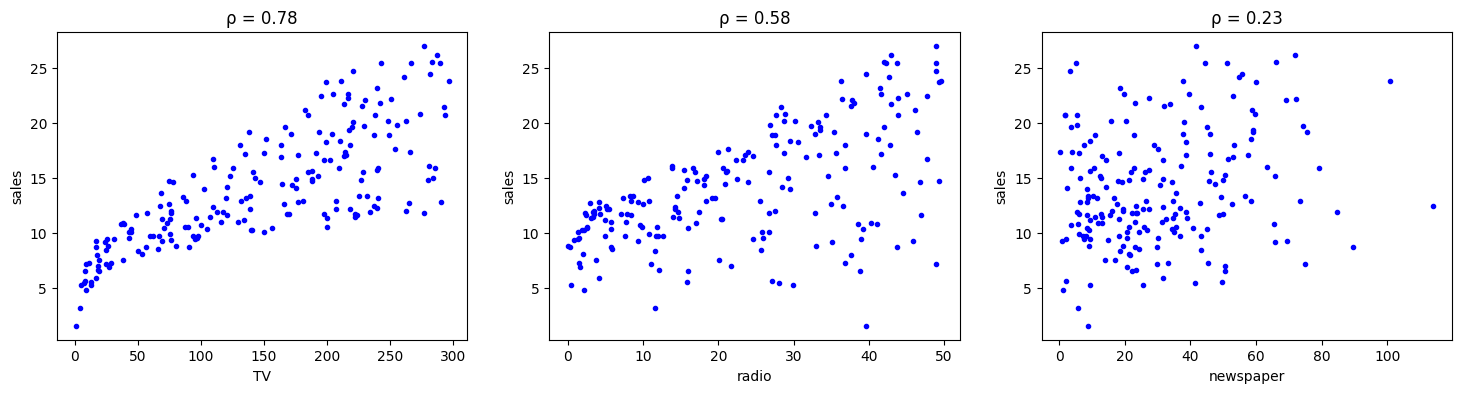

In [46]:
plt.figure(figsize=(18,4))
for i, c in enumerate(df.columns[:-1]):
    plt.subplot(1, 3, i+1)
    plt.plot(df[c], df[df.columns[-1]], 'b.')
    plt.xlabel(c)
    plt.ylabel(df.columns[-1])
    plt.title(f'ρ = {df.corr().loc[c, df.columns[-1]]:.2}')

### Treinamento, avaliação e interpretação

5. Extraia a matriz de projeto $\bX$ e vetor de rótulos $\by$.
1. Separe o conjunto de dados aleatoriamente em conjuntos de treinamento e teste, nas proporções 80% e 20%, respectivamente. Para isso, utilize a função `sklearn.model_selection.train_test_split`.
1. Treine um modelo de regressão linear sobre o conjunto de treinamento e calcule o RMSE da predição sobre o conjunto de treinamento e sobre o conjunto de teste.
1. Trace um gráfico de dispersão da predição em função do valor-alvo (sobreponha ao gráfico do valor-alvo em função dele mesmo para fins de comparação), tanto no conjunto de treinamento quanto no conjunto de teste.
1. Analise o vetor de pesos do modelo treinado e identifique os atributos mais importantes.

In [47]:
X = df[['TV', 'radio', 'newspaper']].to_numpy()
y = df['sales'].to_numpy()
print(X.shape, y.shape)

(200, 3) (200,)


In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20212)
X, y = None, None

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(160, 3) (160,)
(40, 3) (40,)


**Exercício em sala:** resolva o item 7.

<details><summary>Solução</summary>

```python
model = LinearRegression()
model.fit(X_train, y_train)
print('Train RMSE:', root_mean_squared_error(y_train, model.predict(X_train)));
print(' Test RMSE:', root_mean_squared_error(y_test, model.predict(X_test)));
```
</details>

In [49]:
model = LinearRegression()
model.fit(X_train, y_train)
print('Train RMSE:', root_mean_squared_error(y_train, model.predict(X_train)))
print(' Test RMSE:', root_mean_squared_error(y_test, model.predict(X_test)))

Train RMSE: 1.7137894780304224
 Test RMSE: 1.491367538489396


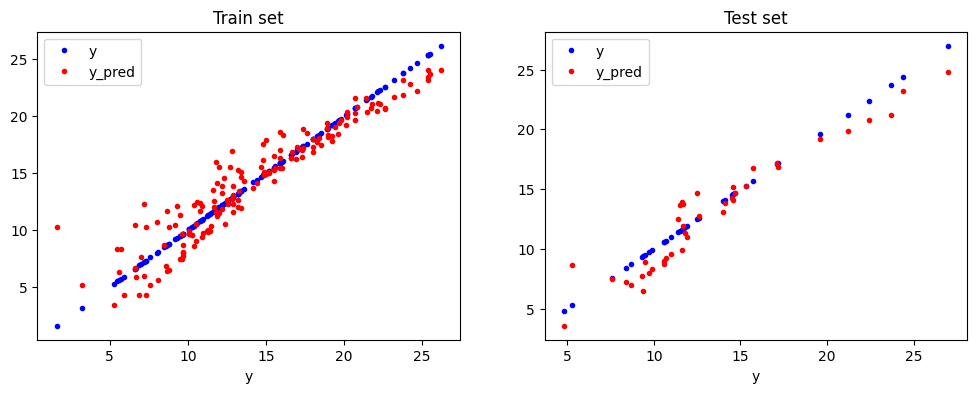

In [50]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('Train set')
plt.plot(y_train, y_train, 'b.', label='y')
plt.plot(y_train, model.predict(X_train), 'r.', label='y_pred')
plt.xlabel('y')
plt.legend()
plt.subplot(1,2,2)
plt.title('Test set')
plt.plot(y_test, y_test, 'b.', label='y')
plt.plot(y_test, model.predict(X_test), 'r.', label='y_pred')
plt.xlabel('y')
plt.legend()

In [51]:
# y_pred = b  +  w1 * tv  +  w2 * radio  +  w3 * newspaper

In [52]:
model.coef_

array([ 0.04624071,  0.18956263, -0.00175866])

In [53]:
model.coef_ * X_train.std(axis=0)

array([ 4.06531299,  2.75360839, -0.03938707])

## Regressão polinomial

In [54]:
def gen_data(n_samples, random_state):
    rng = np.random.RandomState(random_state)
    x = np.linspace(0, 1, n_samples)
    y = 50*np.cos(4*np.pi*x) + 10*rng.standard_normal(size=n_samples)
    X = x.reshape(-1, 1)
    return X, y

(20, 1) (100000, 1) (100000, 1)


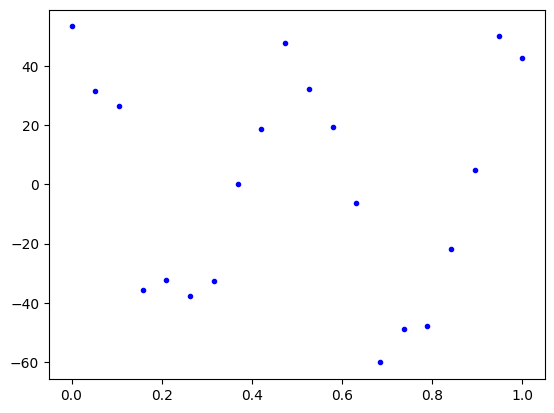

In [55]:
X_train, y_train = gen_data(20, random_state=110)
X_val, y_val = gen_data(100000, random_state=2)
X_test, y_test = gen_data(100000, random_state=5)
print(X_train.shape, X_val.shape, X_test.shape)

# Plot only the training data!
plt.plot(X_train, y_train, 'b.')

Train RMSE: 36.31891699896961
 Test RMSE: 36.807458204075274


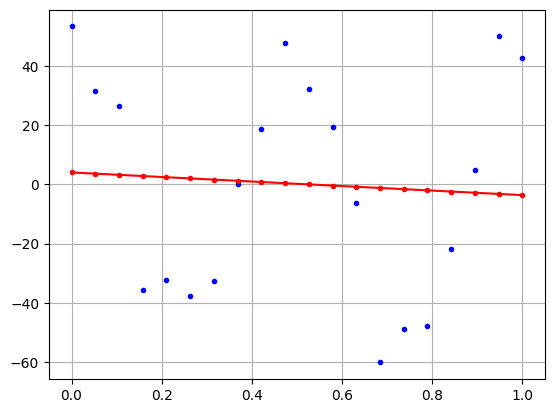

In [56]:
model = LinearRegression()
model.fit(X_train, y_train)
print('Train RMSE:', root_mean_squared_error(y_train, model.predict(X_train)))
print(' Test RMSE:', root_mean_squared_error(y_test, model.predict(X_test)))
plt.plot(X_train, y_train, 'b.')
plt.plot(X_train, model.predict(X_train), 'r.-')
plt.grid()

In [57]:
# Constant baseline
print('Train RMSE (const):', y_train.std())
print(' Test RMSE (const):', root_mean_squared_error(y_test, np.full(y_test.shape, y_train.mean())))

Train RMSE (const): 36.3931448782568
 Test RMSE (const): 36.74133370805903


### Adicionando atributos polinomiais

Exemplo para $d = 3$:

- $(x_1) \mapsto (1,\; x_1,\; x_1^2,\; x_1^3)$

- $(x_1,\; x_2) \mapsto (1,\; x_1,\; x_2,\; x_1^2,\; x_1x_2,\; x_2^2,\; x_1^3,\; x_1^2x_2,\; x_1x_2^2,\; x_2^3)$

Documentação: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [58]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
print(poly.fit_transform([[2, 10]]))

poly = PolynomialFeatures(degree=3)
print(poly.fit_transform([[2, 10]]))

poly = PolynomialFeatures(degree=1, include_bias=False)
print(poly.fit_transform([[2, 10]]))

[[  1.   2.  10.   4.  20. 100.]]
[[   1.    2.   10.    4.   20.  100.    8.   40.  200. 1000.]]
[[ 2. 10.]]


**Abordagem 1**: Pré-processamento **separado** do modelo de aprendizado

Train RMSE: 33.34266798963167
 Test RMSE: 36.14998537976188


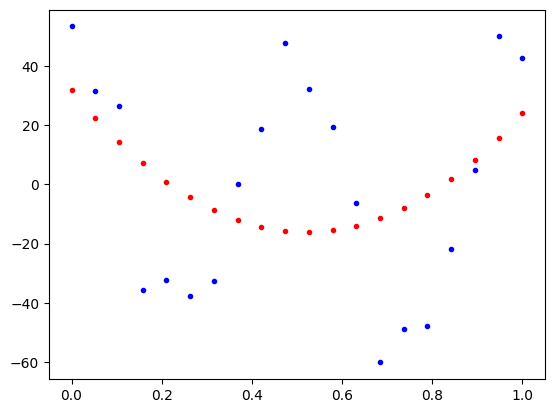

In [59]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_transformed = poly.fit_transform(X_train) # fit and transform
X_test_transformed = poly.transform(X_test)       # don't fit, just transform!

model = LinearRegression()
model.fit(X_train_transformed, y_train)
print('Train RMSE:', root_mean_squared_error(y_train, model.predict(X_train_transformed)))
print(' Test RMSE:', root_mean_squared_error(y_test, model.predict(X_test_transformed)))
plt.plot(X_train, y_train, 'b.')
plt.plot(X_train, model.predict(X_train_transformed), 'r.')

**Abordagem 2**: Pré-processamento **integrado** ao modelo de aprendizado

- https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html
- https://scikit-learn.org/stable/getting_started.html
- https://scikit-learn.org/stable/modules/compose.html

Train RMSE: 33.34266798963167
 Test RMSE: 36.14998537976188


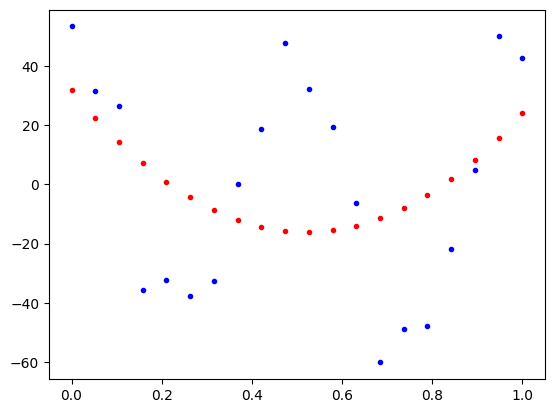

In [60]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(PolynomialFeatures(degree=2, include_bias=False), LinearRegression())
model.fit(X_train, y_train)
print('Train RMSE:', root_mean_squared_error(y_train, model.predict(X_train)))
print(' Test RMSE:', root_mean_squared_error(y_test, model.predict(X_test)))
plt.plot(X_train, y_train, 'b.')
plt.plot(X_train, model.predict(X_train), 'r.')

In [61]:
model

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(include_bias=False)),
                ('linearregression', LinearRegression())])

In [62]:
list(model)

[PolynomialFeatures(include_bias=False), LinearRegression()]

In [63]:
model[0]

PolynomialFeatures(include_bias=False)

In [64]:
model[1]

LinearRegression()

In [65]:
b = model[-1].intercept_
w = model[-1].coef_
print(f'b = {b}, w = {w}')

b = 31.694464994111055, w = [-183.09987747  175.44488915]


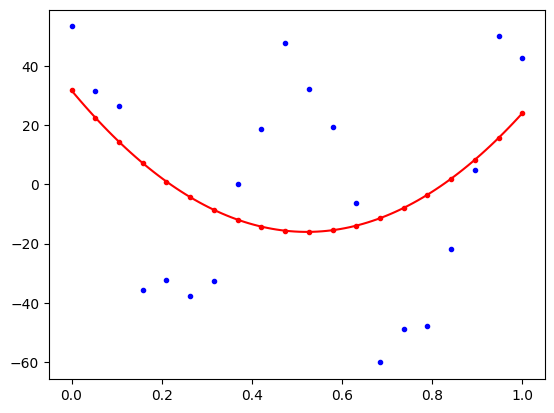

In [66]:
def plot_data(X, y, model=None, n_points=100):
    plt.plot(X, y, 'b.')
    if model is not None:
        plt.plot(X, model.predict(X), 'r.')
        XX = np.linspace(X.min(), X.max(), n_points).reshape(-1, 1)
        plt.plot(XX, model.predict(XX), 'r-')
    return

plot_data(X_train, y_train, model)

**Otimização de hiperparâmetros**

- O grau `d` é um **hiperparâmetro**
- O conjunto de teste só deve ser usado depois de todos os hiperparâmetros terem sido escolhidos
- Por isso, a partir de agora usaremos um **conjunto de validação**
- Hiperparâmetros são otimizados de forma a maximizar o desempenho de validação

In [70]:
from ipywidgets import interact
@interact(d=(1, 20))
def _(d=1):
    model = make_pipeline(PolynomialFeatures(d, include_bias=False), LinearRegression())
    model.fit(X_train, y_train)
    plot_data(X_train, y_train, model)
    print('Train RMSE:', root_mean_squared_error(y_train, model.predict(X_train)))
    print('  Val RMSE:', root_mean_squared_error(y_val, model.predict(X_val)))
    print('Dif:', root_mean_squared_error(y_val, model.predict(X_val)) - root_mean_squared_error(y_train, model.predict(X_train)))

interactive(children=(IntSlider(value=1, description='d', max=20, min=1), Output()), _dom_classes=('widget-int…

(1, 100)

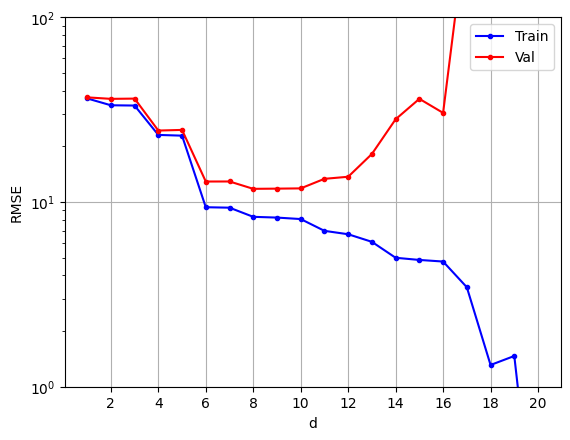

In [71]:
ds = np.arange(1, 21)
train_errors = np.zeros(len(ds))
val_errors = np.zeros(len(ds))
for i in range(len(ds)):
    model = make_pipeline(PolynomialFeatures(ds[i], include_bias=False), LinearRegression())
    model.fit(X_train, y_train)
    train_errors[i] = root_mean_squared_error(y_train, model.predict(X_train))
    val_errors[i] = root_mean_squared_error(y_val, model.predict(X_val))
plt.plot(ds, train_errors, 'b.-', label='Train')
plt.plot(ds, val_errors, 'r.-', label='Val')
plt.xlabel('d')
plt.ylabel('RMSE')
plt.legend()
plt.grid()
plt.yscale('log')
plt.xticks(ds[1::2])
plt.ylim([1, 100])

d = 8
Train RMSE: 8.305089140709923
  Val RMSE: 11.77131805051675
 Test RMSE: 11.827359956326225


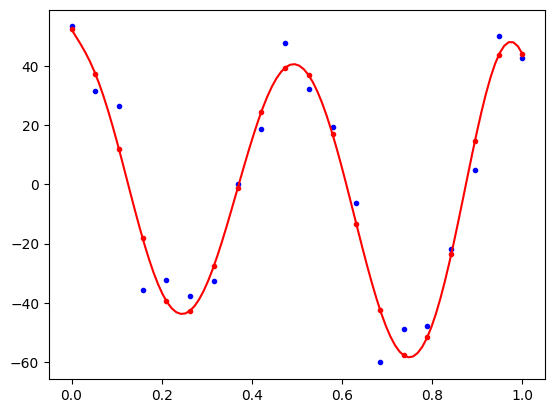

In [72]:
d = ds[val_errors.argmin()]
print('d =', d)
model = make_pipeline(PolynomialFeatures(d, include_bias=False), LinearRegression())
model.fit(X_train, y_train)
plot_data(X_train, y_train, model)
print('Train RMSE:', root_mean_squared_error(y_train, model.predict(X_train)))
print('  Val RMSE:', root_mean_squared_error(y_val, model.predict(X_val)))
print(' Test RMSE:', root_mean_squared_error(y_test, model.predict(X_test)))

### Regularização

- Regressão linear com regularização $\ell_2$ também é conhecida como **ridge regression**
- O uso de regularização introduz mais um hiperparâmetro: o parâmetro de regularização $\lambda$
- No modelo `Ridge` do sklearn, o parâmetro de regularização é denominado `alpha` (ao invés de $\lambda$)
- É recomendável variar $\lambda$ em uma escala logarítmica (e tipicamente $\lambda \ll 1$)
- Não utilize `lambda` como nome de variável, pois no Python `lambda` é uma palavra reservada (operador para criar funções anônimas). Uma sugestão é abreviar para `lamb`.

In [73]:
from ipywidgets import FloatLogSlider
from sklearn.linear_model import Ridge
d = 14
@interact(lamb=FloatLogSlider(1e-24, min=-30, max=3, step=0.5, readout_format='.2e'))
def _(lamb):
    model = make_pipeline(PolynomialFeatures(d, include_bias=False), Ridge(lamb))
    model.fit(X_train, y_train)
    b = model[-1].intercept_
    w = model[-1].coef_
    plot_data(X_train, y_train, model)
    print(f'      λ = {lamb:#.2e}\n')
    print(f'||w||^2 = {np.sum(w**2):#.2e}\n')
    print('Train MSE: %f' % root_mean_squared_error(y_train, model.predict(X_train)))
    print('  Val MSE: %f' % root_mean_squared_error(y_val, model.predict(X_val)))

interactive(children=(FloatLogSlider(value=1e-24, description='lamb', max=3.0, min=-30.0, readout_format='.2e'…

C:\Users\msftr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.72614e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\msftr\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.23309e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


([<matplotlib.axis.XTick at 0x2a679b31520>,
 [Text(1e-24, 0, '$\\mathdefault{10^{-24}}$'),
  Text(1e-21, 0, '$\\mathdefault{10^{-21}}$'),
  Text(1e-18, 0, '$\\mathdefault{10^{-18}}$'),
  Text(1e-15, 0, '$\\mathdefault{10^{-15}}$'),
  Text(1e-12, 0, '$\\mathdefault{10^{-12}}$'),
  Text(1e-09, 0, '$\\mathdefault{10^{-9}}$'),
  Text(1e-06, 0, '$\\mathdefault{10^{-6}}$'),
  Text(0.001, 0, '$\\mathdefault{10^{-3}}$'),
  Text(1.0, 0, '$\\mathdefault{10^{0}}$')])

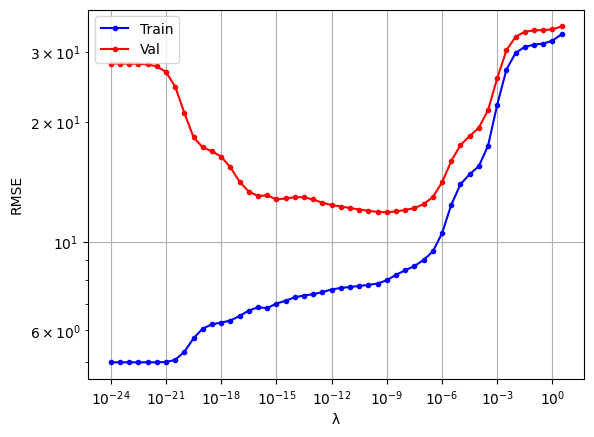

In [74]:
d = 14
lambs = 10**np.arange(-24, 1, 0.5)
train_errors = np.zeros(len(lambs))
val_errors = np.zeros(len(lambs))
for i in range(len(lambs)):
    model = make_pipeline(PolynomialFeatures(d, include_bias=False), Ridge(lambs[i]))
    model.fit(X_train, y_train)
    train_errors[i] = root_mean_squared_error(y_train, model.predict(X_train))
    val_errors[i] = root_mean_squared_error(y_val, model.predict(X_val))
plt.plot(lambs, train_errors, 'b.-', label='Train')
plt.plot(lambs, val_errors, 'r.-', label='Val')
plt.xlabel('λ')
plt.ylabel('RMSE')
plt.legend()
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.xticks(lambs[::6])

d = 14
λ = 1e-09
Train RMSE: 8.012309335923995
  Val RMSE: 11.857331090917544
 Test RMSE: 11.91816676258057


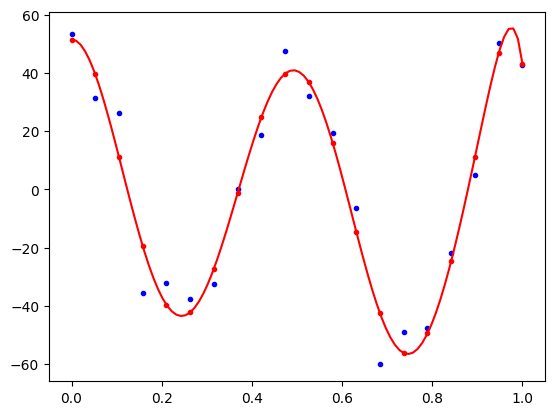

In [75]:
lamb = lambs[val_errors.argmin()]
print('d =', d)
print('λ =', lamb)
model = make_pipeline(PolynomialFeatures(d, include_bias=False), Ridge(lamb))
model.fit(X_train, y_train)
plot_data(X_train, y_train, model)
print('Train RMSE:', root_mean_squared_error(y_train, model.predict(X_train)))
print('  Val RMSE:', root_mean_squared_error(y_val, model.predict(X_val)))
print(' Test RMSE:', root_mean_squared_error(y_test, model.predict(X_test)))

- Uma regularização apropriada é capaz de controlar a complexidade do modelo e assim reduzir o overfitting
- No entanto, regularização elevada tende a causar underfitting

In [76]:
# Searching for the best regularization parameter for a given degree

def search_regularization(d):
    # Requires: X_train, y_train, X_val, y_val
    lambs = 10**np.arange(-24, 1, 0.5)
    val_errors = np.zeros(len(lambs))
    for i in range(len(lambs)):
        model = make_pipeline(PolynomialFeatures(d, include_bias=False), Ridge(lambs[i]))
        model.fit(X_train, y_train)
        val_errors[i] = root_mean_squared_error(y_val, model.predict(X_val))
    lamb = lambs[val_errors.argmin()]
    return lamb

In [77]:
%%time
import warnings
warnings.filterwarnings('ignore', 'Ill-conditioned matrix')
ds = np.arange(1, 21)
lambs = np.zeros(len(ds))
train_errors = np.zeros(len(ds))
val_errors = np.zeros(len(ds))
for i in range(len(ds)):
    lambs[i] = search_regularization(ds[i])
    model = make_pipeline(PolynomialFeatures(ds[i], include_bias=False), Ridge(lambs[i]))
    model.fit(X_train, y_train)
    train_errors[i] = root_mean_squared_error(y_train, model.predict(X_train))
    val_errors[i] = root_mean_squared_error(y_val, model.predict(X_val))
warnings.filterwarnings('default', 'Ill-conditioned matrix')

CPU times: total: 3.97 s
Wall time: 17.1 s


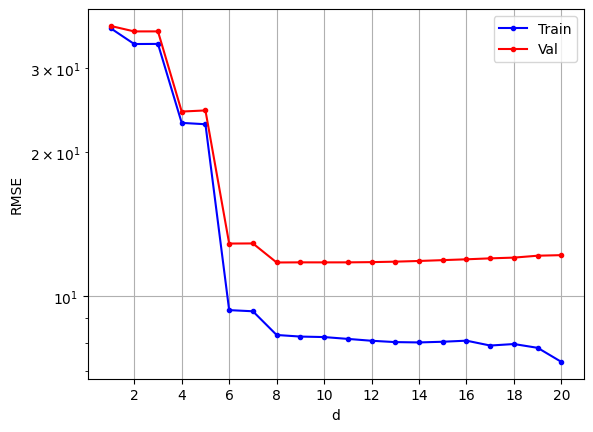

d = 8
λ = 3.1622776601683793e-16
Train RMSE: 8.305089140702712
  Val RMSE: 11.771318707101628
 Test RMSE: 11.827360615331287


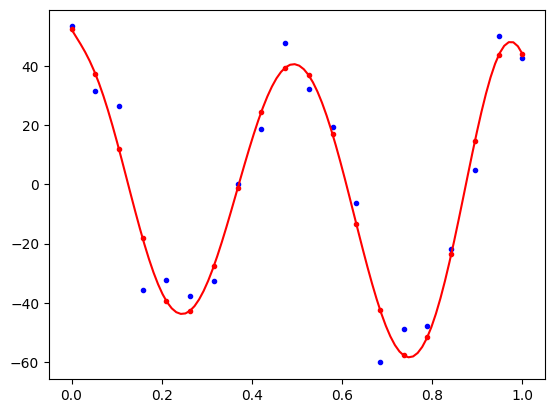

In [78]:
plt.plot(ds, train_errors, 'b.-', label='Train')
plt.plot(ds, val_errors, 'r.-', label='Val')
plt.xlabel('d')
plt.ylabel('RMSE')
plt.legend()
plt.grid()
plt.yscale('log')
plt.xticks(ds[1::2])
plt.show()
i = val_errors.argmin()
d = ds[i]
lamb = lambs[i]
print('d =', d)
print('λ =', lamb)
model = make_pipeline(PolynomialFeatures(d, include_bias=False), Ridge(lamb))
model.fit(X_train, y_train)
plot_data(X_train, y_train, model)
print('Train RMSE:', root_mean_squared_error(y_train, model.predict(X_train)))
print('  Val RMSE:', root_mean_squared_error(y_val, model.predict(X_val)))
print(' Test RMSE:', root_mean_squared_error(y_test, model.predict(X_test)))

### Extração de atributos customizada

b = 1.570934171635208, w = [-7.65498832 48.43412441]
Train RMSE: 9.661758597138254
  Val RMSE: 10.55339228654486


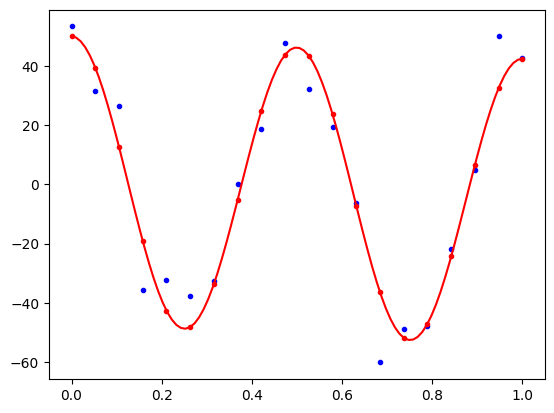

In [79]:
from sklearn.base import BaseEstimator, TransformerMixin
class CustomFeatures(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        X_new = np.c_[X, np.cos(4*np.pi*X)]
        return X_new

model = make_pipeline(CustomFeatures(), LinearRegression())
model.fit(X_train, y_train)
plot_data(X_train, y_train, model)
print(f'b = {model[-1].intercept_}, w = {model[-1].coef_}')
print('Train RMSE:', root_mean_squared_error(y_train, model.predict(X_train)))
print('  Val RMSE:', root_mean_squared_error(y_val, model.predict(X_val)))
#print(' Test RMSE:', root_mean_squared_error(y_test, model.predict(X_test)))